In [1]:
import numpy as np
import matplotlib.pyplot as plt
import henon_map_cpp as hm
from tqdm.notebook import tqdm

In [2]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

RANDOM_SEED = 42
rs = RandomState(MT19937(SeedSequence(RANDOM_SEED)))
def sample_4d_displacement_on_a_sphere():
    n = rs.normal(0, 1, size=4)
    module = np.sqrt(n[0]**2 + n[1]**2 + n[2]**2 + n[3]**2)
    return n / module


In [3]:
cosi = np.asarray([sample_4d_displacement_on_a_sphere() for _ in range(100000)])

In [4]:
cosi_module = np.sqrt(
    np.power(cosi[:, 0], 2) + np.power(cosi[:, 1], 2) + np.power(cosi[:, 2], 2) + np.power(cosi[:, 3], 2))

Text(0.5, 1.0, 'w')

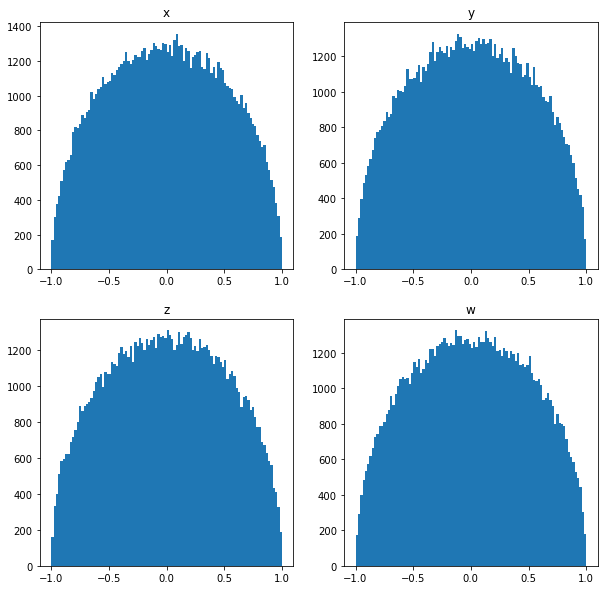

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
axs[0].hist(cosi[:, 0], bins=100);
axs[0].set_title('x')
axs[1].hist(cosi[:, 1], bins=100);
axs[1].set_title('y')
axs[2].hist(cosi[:, 2], bins=100);
axs[2].set_title('z')
axs[3].hist(cosi[:, 3], bins=100);
axs[3].set_title('w')

In [2]:
samples = 4
val = np.linspace(0, 1, samples)
xx, yy = np.meshgrid(val, val)
xx = xx.flatten()
yy = yy.flatten()
zer = np.zeros_like(xx)

In [8]:
particles = hm.particles(xx, zer, yy, zer)
#particles.reset()

In [9]:
particles.add_ghost(1e-4, "x")
particles.add_ghost(1e-3, "px")
particles.add_ghost(1e-2, "y")
particles.add_ghost(1e-1, "py")

In [10]:
particles.get_displacement_module().shape

(16, 4)

In [13]:
particles.get_displacement_module()[:,1]

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

In [10]:
np.asarray(particles.particles.get_ghost())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
np.asarray(particles.particles.get_idx())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [12]:
np.asarray(particles.particles.get_idx_base())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [13]:
len(np.asarray(particles.particles.get_idx_base()))

32

In [14]:
particles.particles.get_n_particles()

16

In [15]:
particles.particles.get_n_ghosts_per_particle()

1

In [16]:
particles.get_displacement_module()

array([[0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001]])

In [19]:
dir = particles.get_displacement_direction()

In [21]:
dir[1]

array([[ 0.73799688],
       [-0.12804619],
       [-0.80929451],
       [ 0.02411995],
       [ 0.46196902],
       [-0.64042754],
       [-0.12241194],
       [ 0.28988623],
       [ 0.02525184],
       [-0.54786356],
       [-0.12972669],
       [ 0.60484449],
       [-0.11816945],
       [-0.2835009 ],
       [-0.84306019],
       [ 0.87108701]])

In [17]:
data = np.asarray(particles.get_displacement_module())
data = data.flatten()
data

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

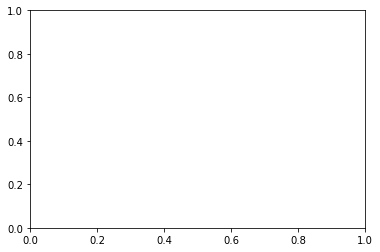

In [ ]:
plt.hist(data, bins=100);
print(data.min(), data.max())

In [ ]:
tracker = hm.henon_tracker(10000, 0.168, 0.201, "sps", np.nan, 64.0, 0)

In [ ]:
lyapunov = np.zeros(samples * samples)
for i in tqdm(range(1000)):
    tracker.track(particles, 10, 0.0)
    lyapunov += np.log(particles.get_displacement_module().flatten() / 1e-10)
    particles.renormalize(1e-10)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
np.asarray(particles.get_steps())

array([10000, 10000, 10000, ...,     3,     3,     3])

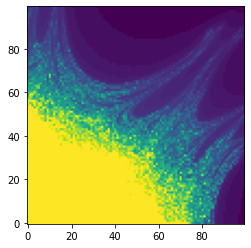

In [ ]:
plt.imshow(np.log10(np.asarray(particles.get_steps()[:100*100])).reshape(samples, samples), origin="lower")

/tmp/ipykernel_290615/1783096690.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(lyapunov).reshape(samples, samples), origin="lower")


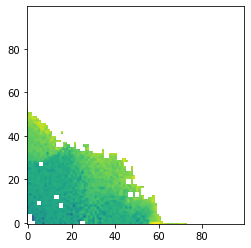

In [ ]:
plt.imshow(np.log10(lyapunov).reshape(samples, samples), origin="lower")

In [ ]:
data = np.asarray(particles.get_displacement_module())
data = data.flatten()


(array([  1.,   1.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   2.,   2.,
          0.,   4.,   4.,   0.,   4.,   7.,   1.,   2.,   6.,   8.,   7.,
          5.,   7.,   5.,   5.,  10.,   9.,  13.,  14.,  10.,  29.,  19.,
         26.,  27.,  33.,  29.,  40.,  31.,  58.,  49.,  63.,  74.,  84.,
         87.,  84., 112., 158., 133., 105.,  88.,  70.,  76.,  66.,  42.,
         57.,  44.,  37.,  32.,  35.,  27.,  21.,  18.,  23.,  17.,  15.,
         25.,  13.,  12.,  15.,   7.,  10.,   7.,   6.,   8.,   4.,   8.,
          3.,   4.,   8.,   5.,   4.,   0.,   2.,   0.,   0.,   1.,   3.,
          2.,   1.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-10.00000014, -10.00000013, -10.00000013, -10.00000013,
        -10.00000012, -10.00000012, -10.00000012, -10.00000012,
        -10.00000011, -10.00000011, -10.00000011, -10.0000001 ,
        -10.0000001 , -10.0000001 , -10.0000001 , -10.00000009,
        -10.00000009, -10.00000009, -10.00000008, -10.00000008

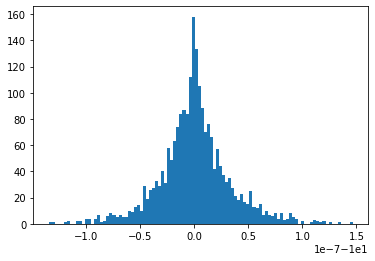

In [ ]:
plt.hist(np.log10(data), bins=100)


/tmp/ipykernel_290615/4242174192.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(lyapunov), bins=100)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,
          1.,   2.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   4.,   1.,
          0.,   2.,   3.,   1.,   5.,  13.,   5.,   9.,   8.,  24.,  30.,
         38.,  49.,  53.,  67.,  91., 129., 132., 106.,  75.,  64.,  42.,
         40.,  39.,  55.,  55.,  44.,  54.,  62.,  56.,  50.,  64.,  65.,
         65.,  49.,  58.,  53.,  49.,  34.,  30.,  21.,  39.,  23.,  26.,
         29.,  28.,  27.,  27.,  29.,  13.,   9.,   7.,   8.,   6.,   1.,
          4.]),
 array([-2.67696437e+00, -2.62233667e+00, -2.56770898e+00, -2.51308128e+00,
        -2.45845358e+00, -2.40382589e+00, -2.34919819e+00, -2.29457049e+00,
        -2.23994280e+00, -2.18531510e+00, -2.13068740e+00, -2.07605971e+00,
        -2.02143201e+00, -1.96680431e+00, -1.91217662e+00, -1.85754892e+00,
        -1.802

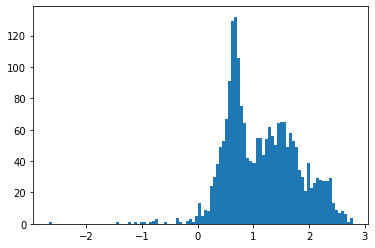

In [ ]:
plt.hist(np.log10(lyapunov), bins=100)


In [ ]:
data = particles.get_displacement_direction()

In [ ]:
data.shape

(4, 10000, 1)

In [ ]:
data[0]

array([[-0.72102078],
       [ 0.04757408],
       [ 0.47618641],
       ...,
       [        nan],
       [        nan],
       [        nan]])